<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Pandas_vrs_Polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---


# **Comparación de Tareas de Preprocesamiento: Pandas vs Polars**
### Autor: ***Felipe Meza-Obando***

### Descripción:
En esta notebook se realiza una comparación entre dos de las bibliotecas más populares para la manipulación y análisis de datos en Python: **Pandas** y **Polars**. El objetivo de este experimento es medir y comparar el rendimiento de las operaciones de preprocesamiento de datos en ambas bibliotecas, evaluando tanto el tiempo de ejecución como la eficiencia en diferentes tareas comunes.

### Tareas de Preprocesamiento:
Las operaciones que se llevarán a cabo incluyen:
1. **Eliminación de valores nulos** (`dropna`).
2. **Filtrado de filas** en base a una condición.
3. **Selección de columnas específicas**.
4. **Aplicación de funciones a columnas** (elevar valores al cuadrado).
5. **Ordenamiento de datos** en base a una columna.
6. **Eliminación de duplicados**.

### Objetivos:
- Comparar los tiempos de ejecución para cada tarea entre **Pandas** y **Polars**.
- Visualizar los resultados mediante gráficos de barras que muestran los tiempos de procesamiento para cada biblioteca.
- Generar una tabla que detalle los tiempos de ejecución de cada tarea en ambas bibliotecas.

### Metodología:
Para cada tarea, se ejecuta la misma operación tanto en un `DataFrame` de **Pandas** como en uno de **Polars**, y se mide el tiempo que tarda en completarse. A través de esta comparación, se pretende destacar las diferencias de rendimiento entre ambas bibliotecas, y proporcionar una guía sobre cuál es más eficiente en diferentes tipos de operaciones de preprocesamiento.

### Resultado esperado:
Al final de esta notebook, se espera contar con una comparativa gráfica y tabular que muestre los tiempos de ejecución de cada tarea en **Pandas** y **Polars**, ayudando a entender las diferencias de rendimiento entre ambas bibliotecas en distintos escenarios.

Tiempo Pandas para Drop NA: 0.0534 segundos
Tiempo Pandas para Filtrado: 0.0080 segundos
Tiempo Pandas para Selección de columnas: 0.0074 segundos
Tiempo Pandas para Aplicar función: 0.0025 segundos
Tiempo Pandas para Ordenar: 0.0341 segundos
Tiempo Pandas para Desduplicación: 0.0588 segundos
Tiempo Polars para Drop NA: 0.0024 segundos
Tiempo Polars para Filtrado: 0.0079 segundos
Tiempo Polars para Selección de columnas: 0.0003 segundos
Tiempo Polars para Aplicar función: 0.0012 segundos
Tiempo Polars para Ordenar: 0.0200 segundos
Tiempo Polars para Desduplicación: 0.0363 segundos


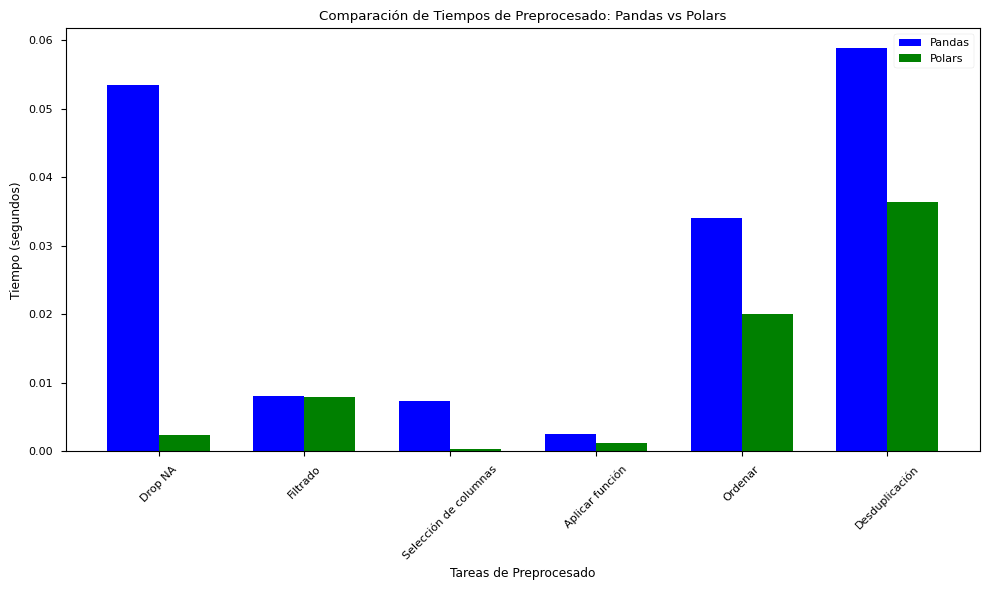


Tabla comparativa de tiempos:

                   Tarea  Tiempo Pandas (segundos)  Tiempo Polars (segundos)
0                Drop NA                  0.053426                  0.002357
1               Filtrado                  0.008037                  0.007886
2  Selección de columnas                  0.007351                  0.000272
3        Aplicar función                  0.002452                  0.001242
4                Ordenar                  0.034056                  0.020010
5         Desduplicación                  0.058761                  0.036300


In [35]:
import pandas as pd  # Librería Pandas para manejo de DataFrames
import polars as pl  # Librería Polars para manejo eficiente de DataFrames
import numpy as np  # Librería NumPy para generar datos aleatorios
import time  # Librería para medir tiempos de ejecución
import matplotlib.pyplot as plt  # Librería para graficar
plt.style.use("seaborn-v0_8-paper")

# Función para generar un dataset sintético
def generar_dataset(n_rows=100000):
    """Genera un dataset de ejemplo con columnas aleatorias."""
    data = {
        'A': np.random.randint(1, 101, n_rows),  # Columna de enteros aleatorios entre 1 y 100
        'B': np.random.randint(1, 101, n_rows),  # Columna de enteros aleatorios entre 1 y 100
        'C': np.random.randint(1, 101, n_rows),  # Columna de enteros aleatorios entre 1 y 100
        'D': np.random.choice(['low', 'medium', 'high'], n_rows),  # Columna con categorías aleatorias
        'E': np.random.randn(n_rows)  # Columna de números aleatorios con distribución normal
    }
    return pd.DataFrame(data)  # Devolver como DataFrame de Pandas

# Generar dataset y convertirlo para usarlo en Polars y Pandas
df_pandas = generar_dataset()  # Dataset para Pandas
df_polars = pl.DataFrame(df_pandas)  # Conversión a DataFrame de Polars

# Función para medir y ejecutar una tarea de preprocesado en Pandas
def medir_tarea_pandas(func, df, tarea):
    """Mide el tiempo de ejecución de una tarea de Pandas."""
    start_time = time.time()  # Tiempo inicial
    result = func(df)  # Ejecutar la tarea
    end_time = time.time()  # Tiempo final
    print(f"Tiempo Pandas para {tarea}: {end_time - start_time:.4f} segundos")
    return result, end_time - start_time  # Devolver el resultado y el tiempo

# Función para medir y ejecutar una tarea de preprocesado en Polars
def medir_tarea_polars(func, df, tarea):
    """Mide el tiempo de ejecución de una tarea de Polars."""
    start_time = time.time()  # Tiempo inicial
    result = func(df)  # Ejecutar la tarea
    end_time = time.time()  # Tiempo final
    print(f"Tiempo Polars para {tarea}: {end_time - start_time:.4f} segundos")
    return result, end_time - start_time  # Devolver el resultado y el tiempo

### Tareas de preprocesamiento con Pandas ###

def pandas_dropna(df):
    """Elimina filas con valores nulos en Pandas."""
    return df.dropna()

def pandas_filter(df):
    """Filtra las filas donde la columna 'A' es mayor a 50 en Pandas."""
    return df[df['A'] > 50]

def pandas_select_columns(df):
    """Selecciona columnas específicas (A, B, E) en Pandas."""
    return df[['A', 'B', 'E']]

def pandas_apply_function(df):
    """Aplica una función a la columna 'B' (elevar al cuadrado) en Pandas."""
    df = df.copy()  # Hacer una copia explícita para evitar SettingWithCopyWarning
    df.loc[:, 'B_squared'] = df['B'] ** 2
    return df

def pandas_sort(df):
    """Ordena las filas por la columna 'E' de forma descendente en Pandas."""
    return df.sort_values(by='E', ascending=False)

def pandas_deduplication(df):
    """Elimina filas duplicadas en Pandas."""
    return df.drop_duplicates()

### Tareas de preprocesamiento con Polars ###

def polars_dropna(df):
    """Elimina filas con valores nulos en Polars."""
    return df.drop_nulls()

def polars_filter(df):
    """Filtra las filas donde la columna 'A' es mayor a 50 en Polars."""
    return df.filter(pl.col('A') > 50)

def polars_select_columns(df):
    """Selecciona columnas específicas (A, B, E) en Polars."""
    return df.select(['A', 'B', 'E'])

def polars_apply_function(df):
    """Aplica una función a la columna 'B' (elevar al cuadrado) en Polars."""
    return df.with_columns((pl.col('B') ** 2).alias('B_squared'))

def polars_sort(df):
    """Ordena las filas por la columna 'E' de forma descendente en Polars."""
    return df.sort('E', descending=True)

def polars_deduplication(df):
    """Elimina filas duplicadas en Polars."""
    return df.unique()

### Ejecución de todas las tareas de preprocesamiento ###

# Ejecución de las tareas en Pandas
pandas_dropna_result, tiempo_pandas_dropna = medir_tarea_pandas(pandas_dropna, df_pandas, "Drop NA")
pandas_filter_result, tiempo_pandas_filter = medir_tarea_pandas(pandas_filter, pandas_dropna_result, "Filtrado")
pandas_select_columns_result, tiempo_pandas_select_columns = medir_tarea_pandas(pandas_select_columns, pandas_filter_result, "Selección de columnas")
pandas_apply_function_result, tiempo_pandas_apply_function = medir_tarea_pandas(pandas_apply_function, pandas_select_columns_result, "Aplicar función")
pandas_sort_result, tiempo_pandas_sort = medir_tarea_pandas(pandas_sort, pandas_apply_function_result, "Ordenar")
pandas_deduplication_result, tiempo_pandas_deduplication = medir_tarea_pandas(pandas_deduplication, pandas_sort_result, "Desduplicación")

# Ejecución de las tareas en Polars
polars_dropna_result, tiempo_polars_dropna = medir_tarea_polars(polars_dropna, df_polars, "Drop NA")
polars_filter_result, tiempo_polars_filter = medir_tarea_polars(polars_filter, polars_dropna_result, "Filtrado")
polars_select_columns_result, tiempo_polars_select_columns = medir_tarea_polars(polars_select_columns, polars_filter_result, "Selección de columnas")
polars_apply_function_result, tiempo_polars_apply_function = medir_tarea_polars(polars_apply_function, polars_select_columns_result, "Aplicar función")
polars_sort_result, tiempo_polars_sort = medir_tarea_polars(polars_sort, polars_apply_function_result, "Ordenar")
polars_deduplication_result, tiempo_polars_deduplication = medir_tarea_polars(polars_deduplication, polars_sort_result, "Desduplicación")

### Comparativa de tiempos de cada tarea ###

# Nombres de las tareas
tareas = ['Drop NA', 'Filtrado', 'Selección de columnas', 'Aplicar función', 'Ordenar', 'Desduplicación']

# Tiempos de ejecución en Pandas
tiempos_pandas = [tiempo_pandas_dropna, tiempo_pandas_filter, tiempo_pandas_select_columns,
                  tiempo_pandas_apply_function, tiempo_pandas_sort, tiempo_pandas_deduplication]

# Tiempos de ejecución en Polars
tiempos_polars = [tiempo_polars_dropna, tiempo_polars_filter, tiempo_polars_select_columns,
                  tiempo_polars_apply_function, tiempo_polars_sort, tiempo_polars_deduplication]

# Crear gráfico comparativo de tiempos
plt.figure(figsize=(10, 6))
x = np.arange(len(tareas))  # Índices de las tareas
width = 0.35  # Ancho de las barras

# Graficar los tiempos de Pandas y Polars
plt.bar(x - width/2, tiempos_pandas, width, label='Pandas', color='blue')
plt.bar(x + width/2, tiempos_polars, width, label='Polars', color='green')

# Etiquetas y título del gráfico
plt.xlabel('Tareas de Preprocesado')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de Tiempos de Preprocesado: Pandas vs Polars')
plt.xticks(x, tareas, rotation=45)  # Colocar los nombres de las tareas en el eje x
plt.legend()  # Mostrar la leyenda
plt.tight_layout()  # Ajustar el diseño para que no se sobrepongan elementos
plt.show()

### Tabla comparativa de tiempos ###

# Crear DataFrame comparativo entre Pandas y Polars
tabla_comparativa = pd.DataFrame({
    'Tarea': tareas,
    'Tiempo Pandas (segundos)': tiempos_pandas,
    'Tiempo Polars (segundos)': tiempos_polars
})

# Mostrar tabla comparativa
print("\nTabla comparativa de tiempos:\n")
print(tabla_comparativa)






### Resumen Técnico: Pandas vs Polars

#### Pandas
**Pandas** es una de las bibliotecas más populares para el análisis y manipulación de datos en Python. Ofrece estructuras de datos como `DataFrame` y `Series` que facilitan el manejo de datos tabulares. Pandas es conocido por su simplicidad y capacidad para realizar una amplia variedad de operaciones en datasets pequeños a medianos, pero puede enfrentar desafíos de rendimiento y uso de memoria en datasets más grandes.

##### Ventajas de Pandas:
1. **Facilidad de uso**: Su API es muy intuitiva, lo que permite a los usuarios realizar operaciones complejas en pocas líneas de código.
2. **Ecosistema**: Pandas está bien integrado con otras bibliotecas del ecosistema de Python, como Matplotlib, NumPy y Scikit-learn.
3. **Amplia adopción**: Es una herramienta madura y con una comunidad activa, por lo que hay muchos recursos y soporte disponibles.
4. **Soporte completo para índices**: Los DataFrames de Pandas tienen un sistema de índices completo, lo que permite realizar operaciones avanzadas como la búsqueda eficiente y el "joining" entre conjuntos de datos.

##### Desventajas de Pandas:
1. **Uso de memoria**: Pandas puede consumir grandes cantidades de memoria, ya que sus estructuras están optimizadas para facilitar su uso y no necesariamente para ser eficientes en términos de memoria.
2. **Rendimiento en datasets grandes**: Cuando los datasets crecen en tamaño, Pandas tiende a volverse más lento, y no maneja bien operaciones distribuidas.
3. **Ejecución en un solo núcleo**: Pandas ejecuta la mayoría de sus operaciones en un solo núcleo, lo que limita su escalabilidad en términos de rendimiento cuando se manejan grandes volúmenes de datos.

#### Polars
**Polars** es una biblioteca de análisis de datos optimizada para la velocidad y el uso eficiente de memoria. Está escrita en Rust y puede procesar datos mucho más rápido que Pandas. Polars es "multi-threaded" por defecto, lo que permite realizar operaciones en paralelo, mejorando así el rendimiento en sistemas con múltiples núcleos.

##### Ventajas de Polars:
1. **Alto rendimiento**: Polars es significativamente más rápido que Pandas en la mayoría de las operaciones, especialmente con grandes volúmenes de datos, debido a su implementación en Rust y su uso de procesamiento paralelo.
2. **Bajo consumo de memoria**: Polars maneja la memoria de manera mucho más eficiente que Pandas, lo que permite trabajar con datasets más grandes en máquinas con menos recursos.
3. **Multi-threading nativo**: Polars aprovecha múltiples núcleos de CPU, lo que permite realizar operaciones paralelas automáticamente.
4. **Optimización automática**: Polars puede optimizar las consultas de manera inteligente, lo que ayuda a mejorar el rendimiento sin que el usuario necesite modificar el código.

##### Desventajas de Polars:
1. **Menos madurez**: Aunque Polars está creciendo rápidamente, todavía es una biblioteca más joven que Pandas, lo que significa que hay menos recursos y una comunidad más pequeña.
2. **Curva de aprendizaje**: Aunque la API de Polars es similar a la de Pandas, hay diferencias en algunas funcionalidades, lo que puede requerir un tiempo de adaptación.
3. **Limitada integración**: En comparación con Pandas, Polars aún no está tan bien integrado con otras bibliotecas populares del ecosistema de Python, lo que puede ser una desventaja para proyectos que dependen de herramientas como Scikit-learn o Matplotlib.

### Conclusión
- **Pandas** es ideal para proyectos donde la facilidad de uso y la compatibilidad con el ecosistema de Python son más importantes que el rendimiento en datasets masivos.
- **Polars**, por otro lado, es excelente cuando se necesita procesar grandes volúmenes de datos de manera eficiente y rápida, aprovechando al máximo los recursos de hardware.

Ambas bibliotecas tienen sus nichos de uso, y la elección depende del tamaño de los datos y los requisitos de rendimiento del proyecto.